In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('AirQualityUCI.csv')
df = df.iloc[:,:15]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['Date','Time'],axis=True)
df


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [5]:
for i in range(df.shape[1]):
    if df.iloc[:,i].isna().sum()!=0:
        mean = df.iloc[:,i].mean()
        df.iloc[:,i] = df.iloc[:,i].fillna(mean)

In [6]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
df.shape

(9471, 13)

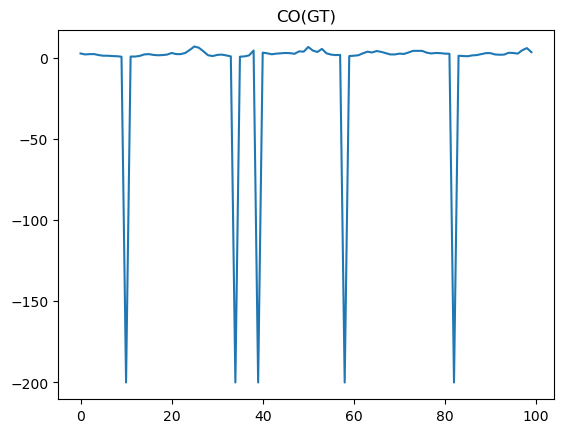

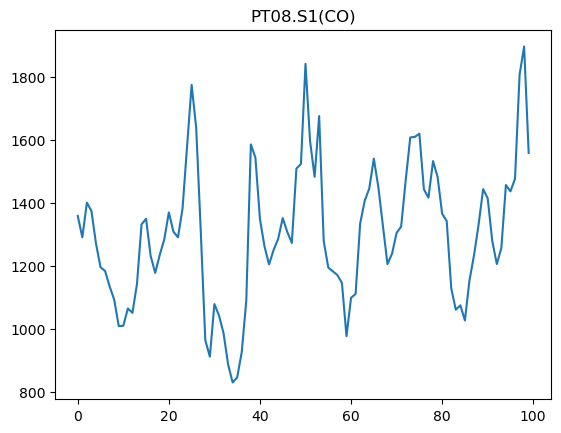

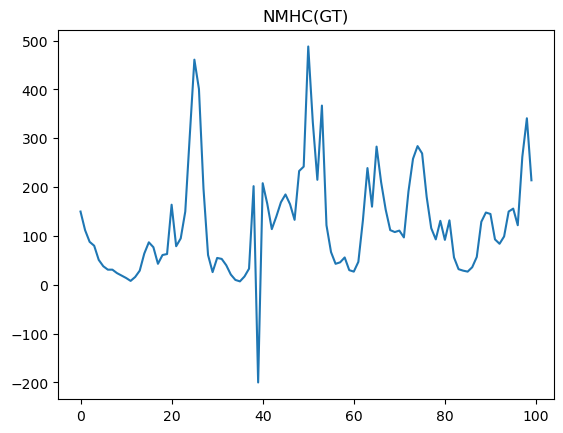

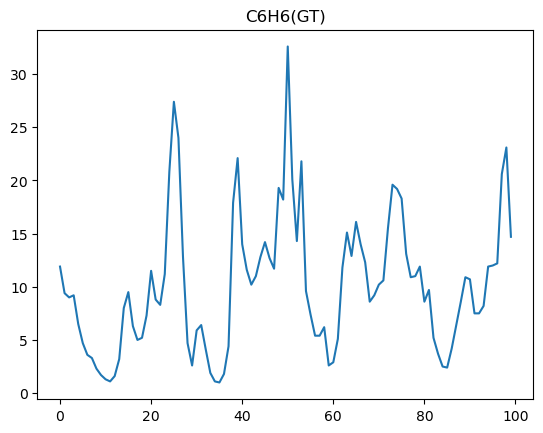

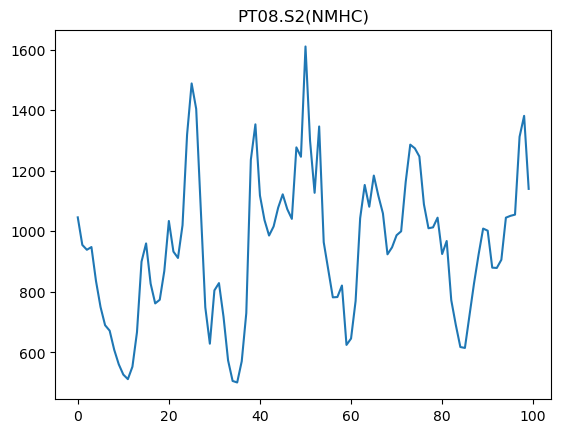

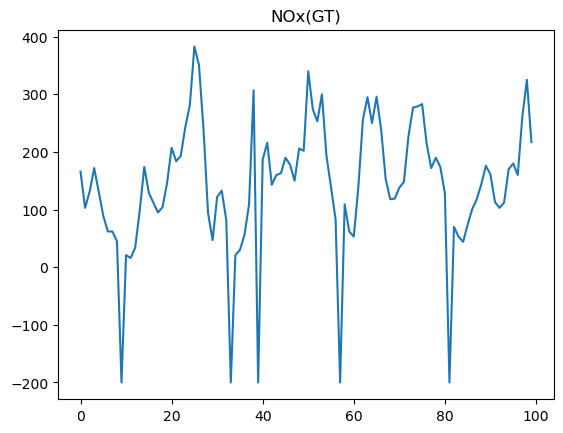

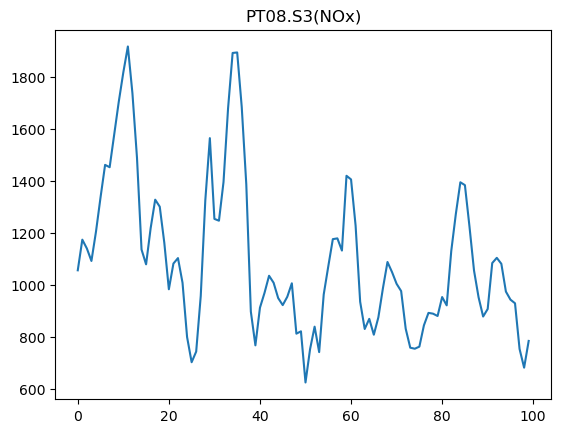

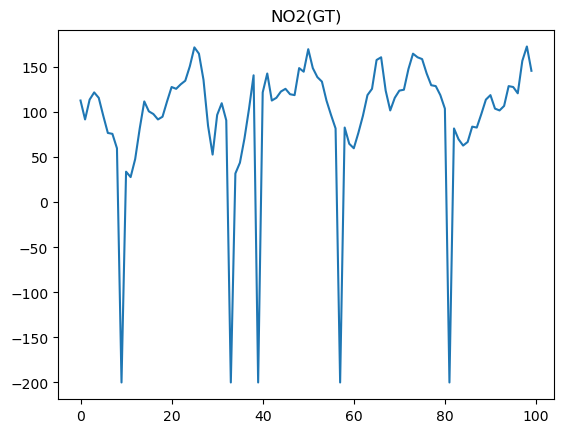

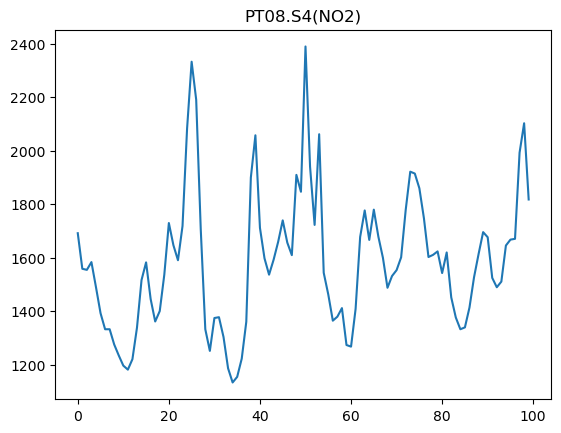

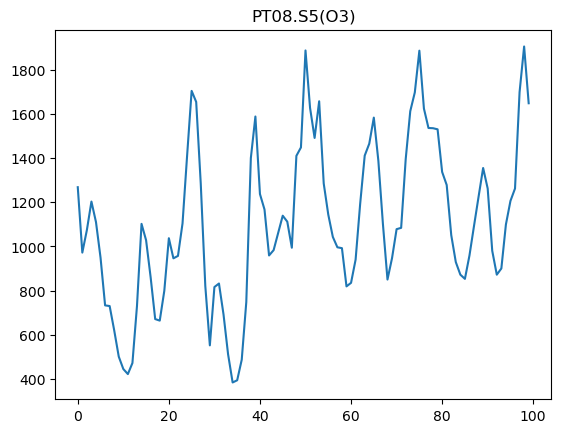

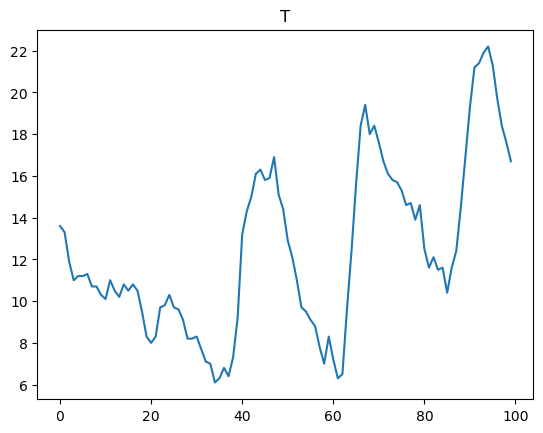

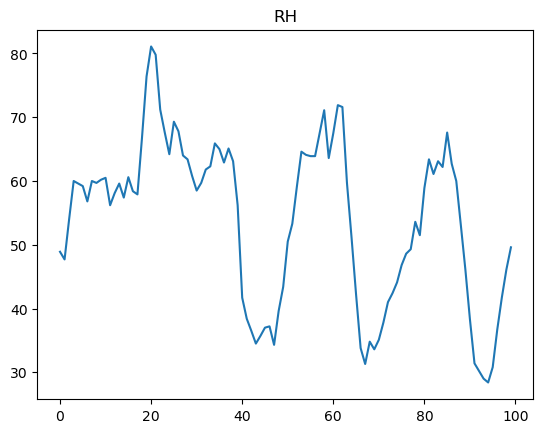

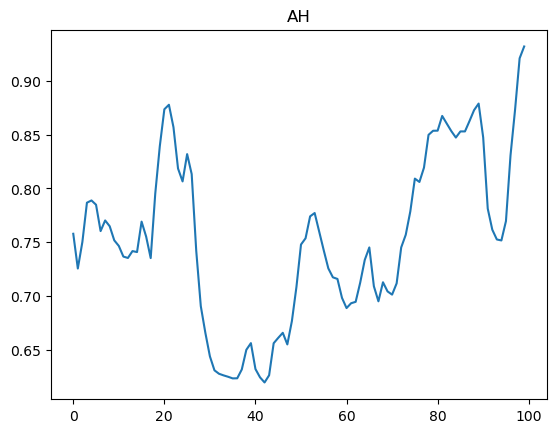

In [8]:
for i in range(df.shape[1]):
    plt.plot(df.iloc[:100,i])
    plt.title(df.columns[i])
    plt.show()

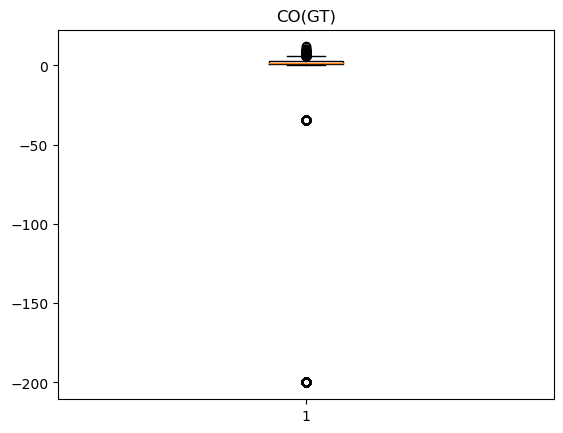

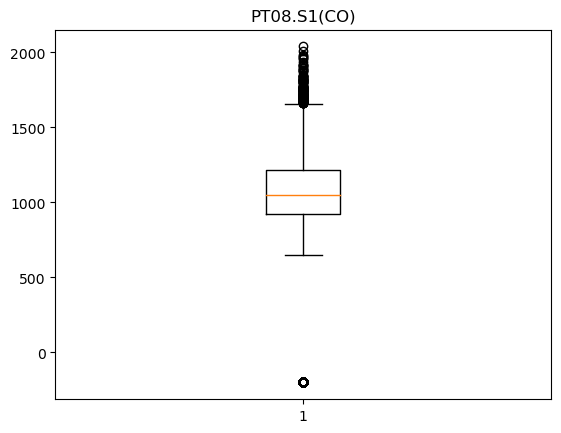

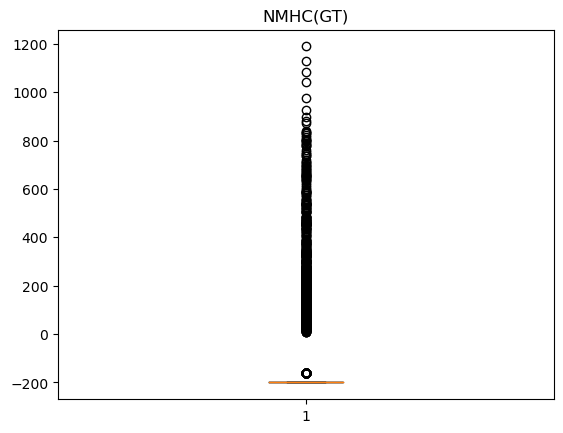

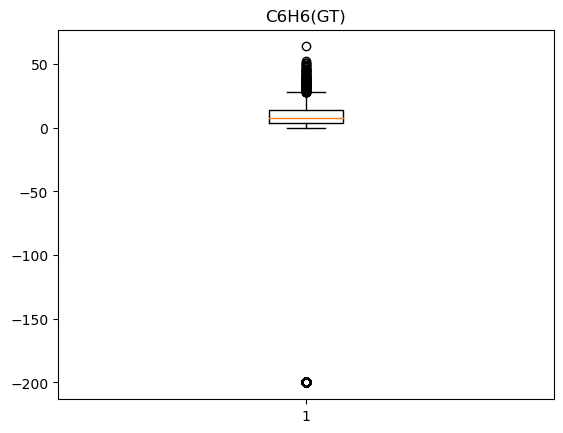

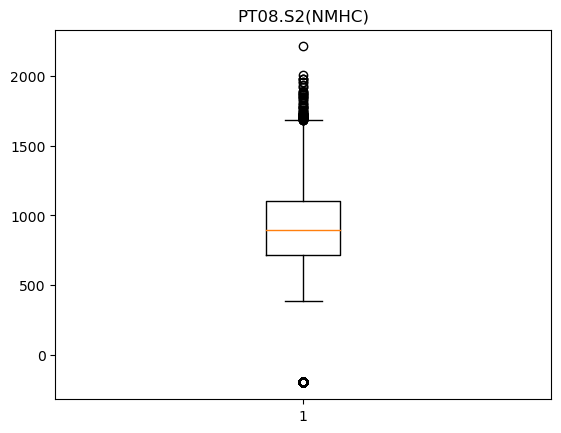

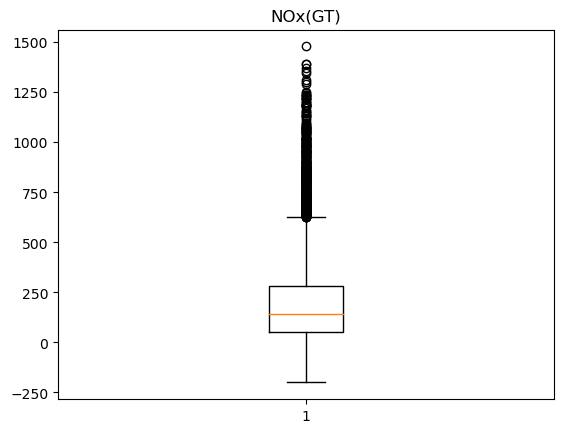

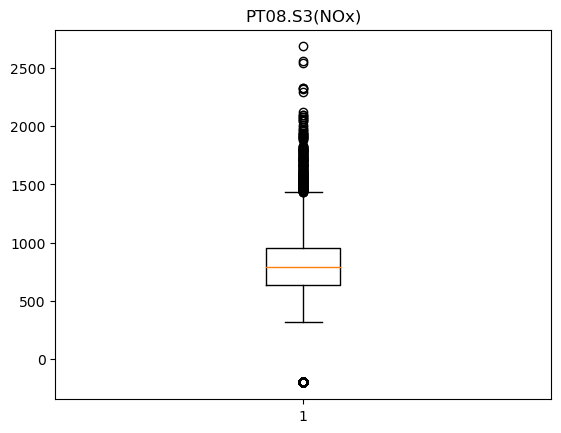

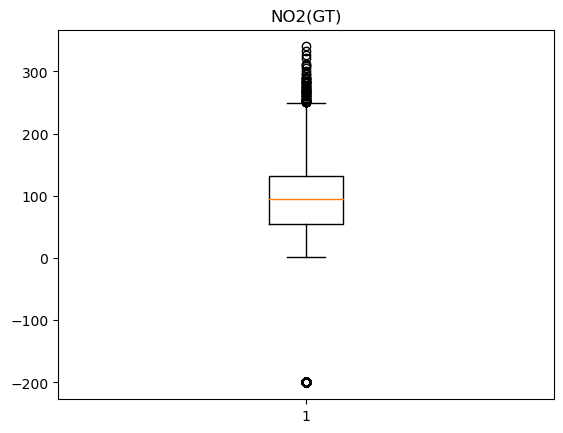

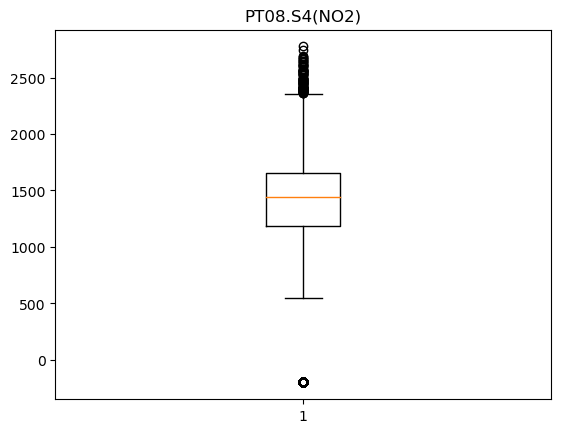

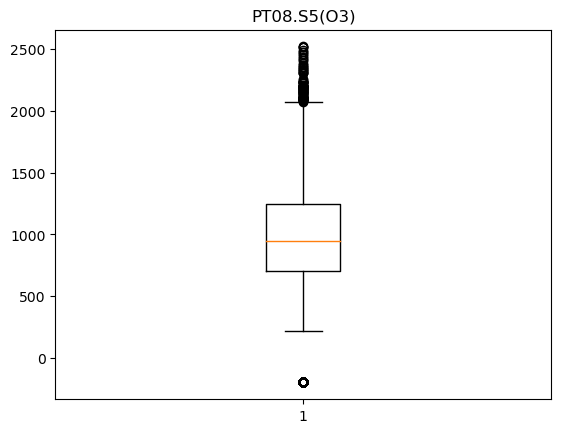

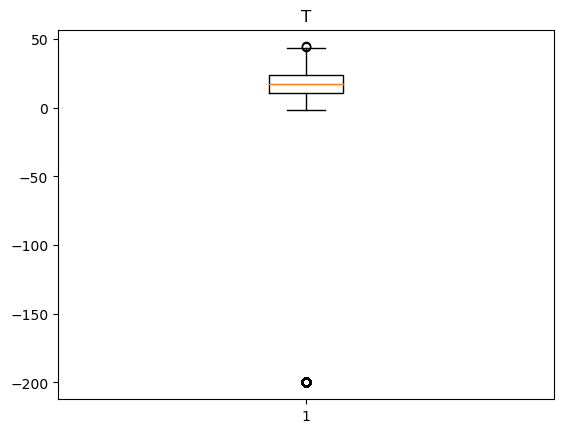

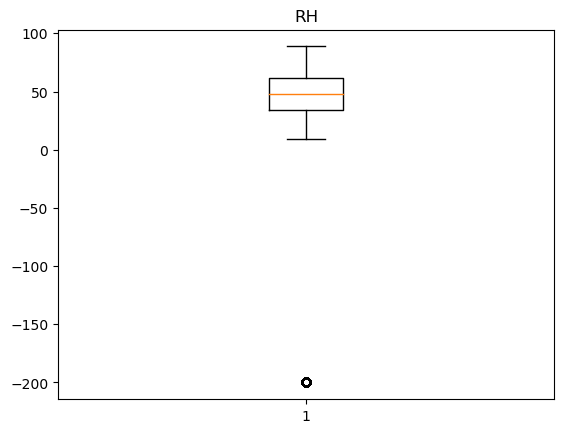

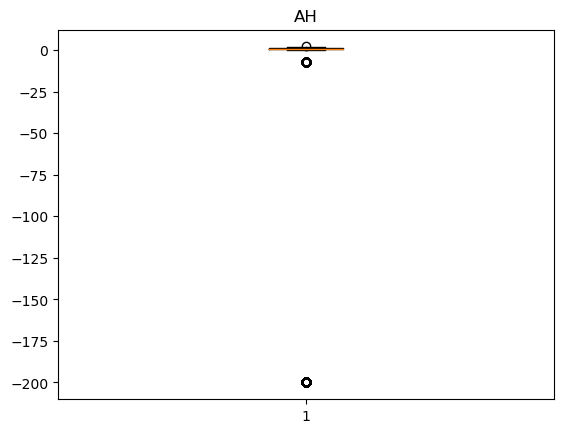

In [9]:
for i in range(df.shape[1]):
    plt.boxplot(df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

In [10]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.188336,327.841433,138.945154,41.130385,340.266507,255.879678,320.049602,126.174086,464.389469,454.179543,42.942793,50.906941,38.741359
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,923.000000,-200.000000,3.900000,713.000000,51.000000,639.000000,54.000000,1189.000000,703.000000,10.700000,34.250000,0.676800
50%,1.500000,1050.000000,-200.000000,7.800000,894.595276,144.000000,794.990168,95.000000,1440.000000,949.000000,17.000000,48.100000,0.971100
75%,2.600000,1218.000000,-200.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9471 non-null   float64
 1   PT08.S1(CO)    9471 non-null   float64
 2   NMHC(GT)       9471 non-null   float64
 3   C6H6(GT)       9471 non-null   float64
 4   PT08.S2(NMHC)  9471 non-null   float64
 5   NOx(GT)        9471 non-null   float64
 6   PT08.S3(NOx)   9471 non-null   float64
 7   NO2(GT)        9471 non-null   float64
 8   PT08.S4(NO2)   9471 non-null   float64
 9   PT08.S5(O3)    9471 non-null   float64
 10  T              9471 non-null   float64
 11  RH             9471 non-null   float64
 12  AH             9471 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


In [12]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
y = torch.tensor(df['AH'].values,dtype =torch.float32)
x = torch.tensor(df.drop('AH',axis=True).values,dtype =torch.float32)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
x_train = torch.tensor(x_train,dtype = torch.float32)
x_test = torch.tensor(x_test,dtype = torch.float32)

In [17]:
class LinearRegression(nn.Module):
    def __init__(self,input_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,1)
    def forward(self,x):
        return self.linear(x)

In [18]:
input_size  = x_train.shape[1]
model = LinearRegression(input_size)
criteria = nn.MSELoss()
optimizer  = optim.SGD(model.parameters(),lr=0.01)

In [19]:
num_epoch = 100
train = []
test = []

In [20]:
for i in range(num_epoch):
    output = model(x_train)
    loss = criteria(output,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        y_pred_test = model(x_test)
        test_loss = criteria(y_pred_test,y_test)
    
    train.append(loss.item())
    test.append(test_loss.item())

c:\Users\51man\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6629])) that is different to the input size (torch.Size([6629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\51man\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2842])) that is different to the input size (torch.Size([2842, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


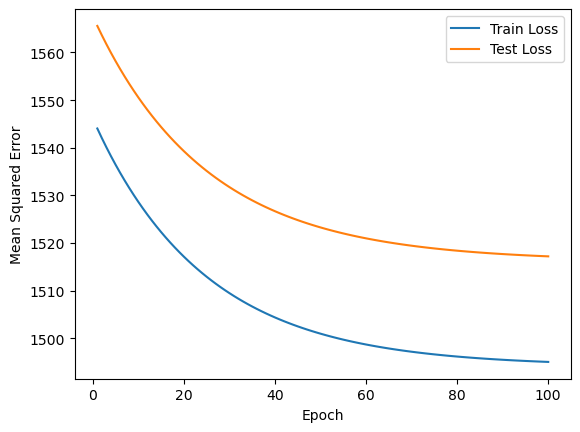

In [21]:
plt.plot(range(1,num_epoch+1),train,label='Train Loss')
plt.plot(range(1,num_epoch+1),test,label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()